### Loading & visualize Data

In [19]:
import pandas as pd
import numpy as np

In [64]:
!python -m pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 704.7 kB/s eta 0:00:00


In [21]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [22]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [26]:
df=df[["v1","v2"]]
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [27]:
df.head()

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

2450    0
1215    0
4796    1
3451    0
2035    0
Name: message_type, dtype: int32

#### check for the missing values

In [29]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [30]:
df.duplicated().sum()

403

In [31]:
#remove the duplicates
df= df.drop_duplicates()

### Exploratory Data Analysis
visualize to better understanding of the data

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

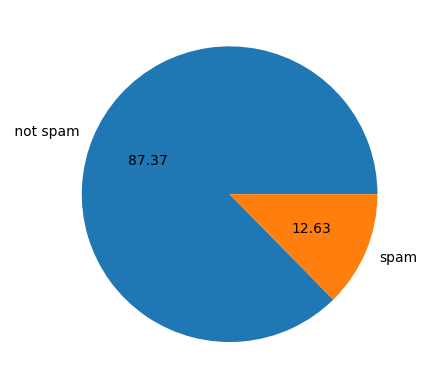

In [34]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

Now lets check No. of characters, words,and sentences in the data with adding three new columns

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['num_characters']=df['message'].apply(len)
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [40]:
df.head()

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Ham Messages description

In [41]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


Spam Messages description

In [42]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


Lets Visualize the number of charecter in Ham Vs Spam

In [53]:
Ham_char_count=df[df['message_type']==0]['num_characters']
Spam_char_count=df[df['message_type']==1]['num_characters']


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

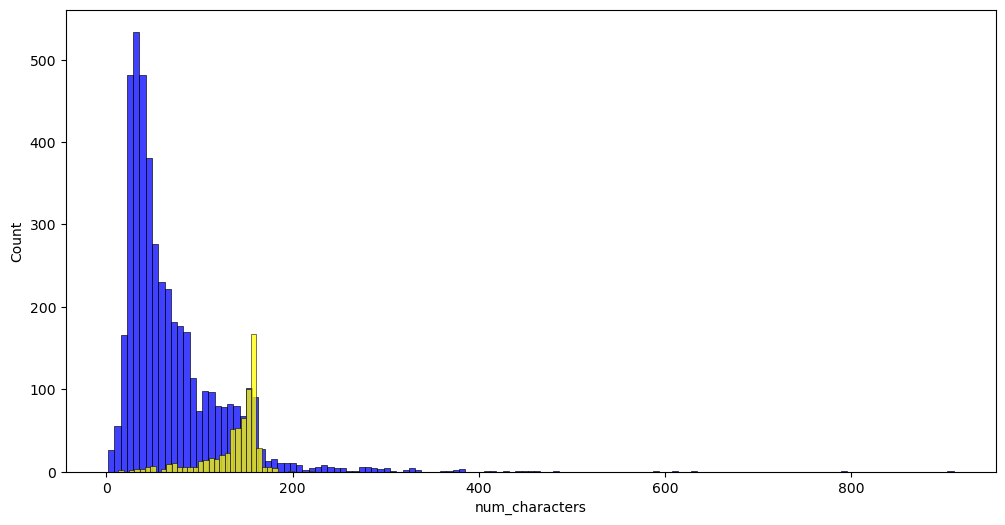

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(Ham_char_count, color="blue")
sns.histplot(Spam_char_count, color="yellow")

we can see that the spam message are more long

Multicollinearity is a concern in this context, prompting the exclusion of all three columns. Instead, we will opt for a singular column, specifically choosing "num_characters" due to its strongest correlation with the variable "message_type."

<AxesSubplot:>

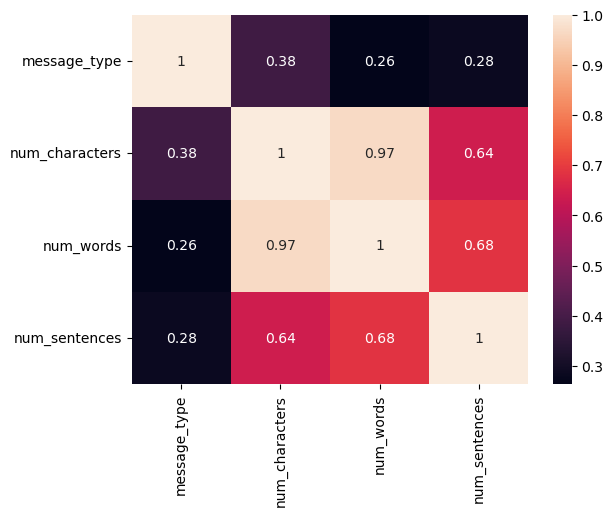

In [55]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

### Data preprocess

In [56]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
# Create a stop list
stoplist = stopwords.words('english') + list(string.punctuation)
stoplist = set(stoplist)

Remove unrelated words or symbols

In [58]:
def trim_word(text):
    text = [word for word in word_tokenize(text) if word.lower() not in stoplist and not word.isdigit() and word.isalpha()]
    return " ".join(text)

In [60]:
df['message'] = df['message'].astype(str)
df['transformed_msg'] = df['message'].apply(trim_word)

In [61]:
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry wkly comp win FA Cup final tkts May...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor U c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,Nah think goes usf lives around though


Check for the most frequent words

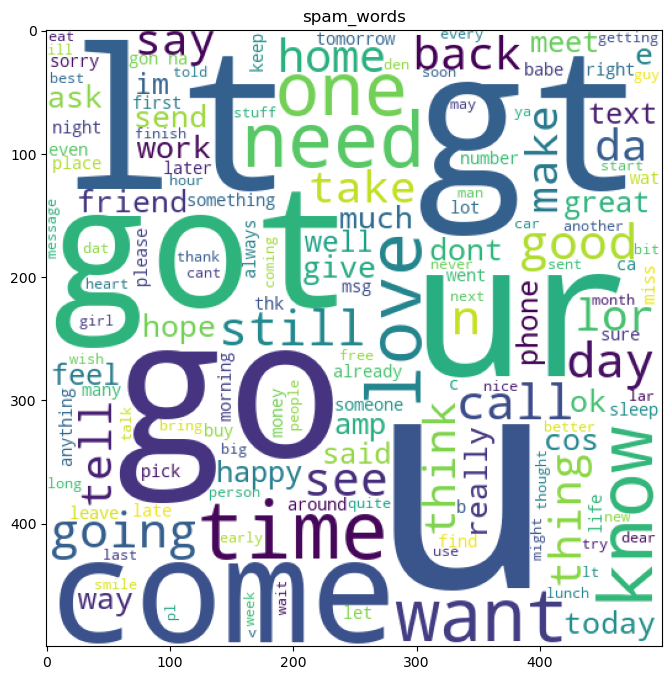

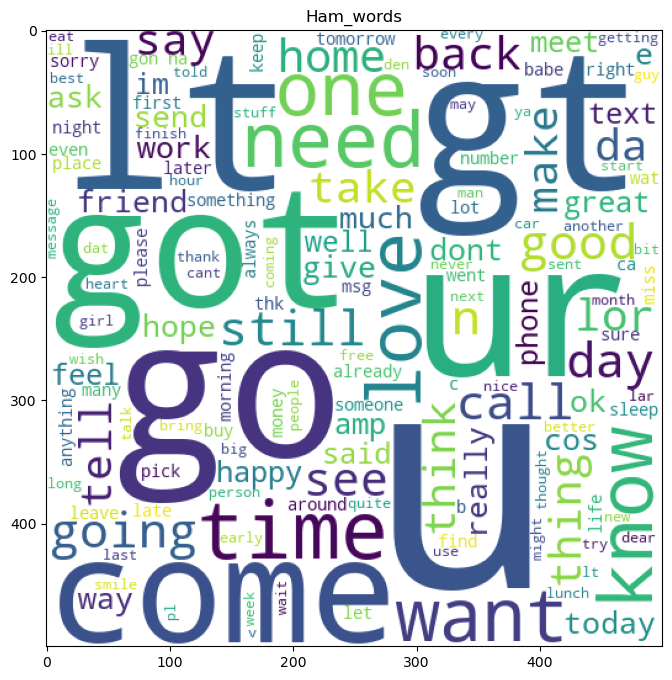

In [68]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(12,8))
plt.title("spam_words")
plt.imshow(spam_wc)
plt.figure(figsize=(12,8))
plt.title("Ham_words")
plt.imshow(ham_wc)

Lets Find out top 15 words in both Spam and Ham messages

C:\Users\shahr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


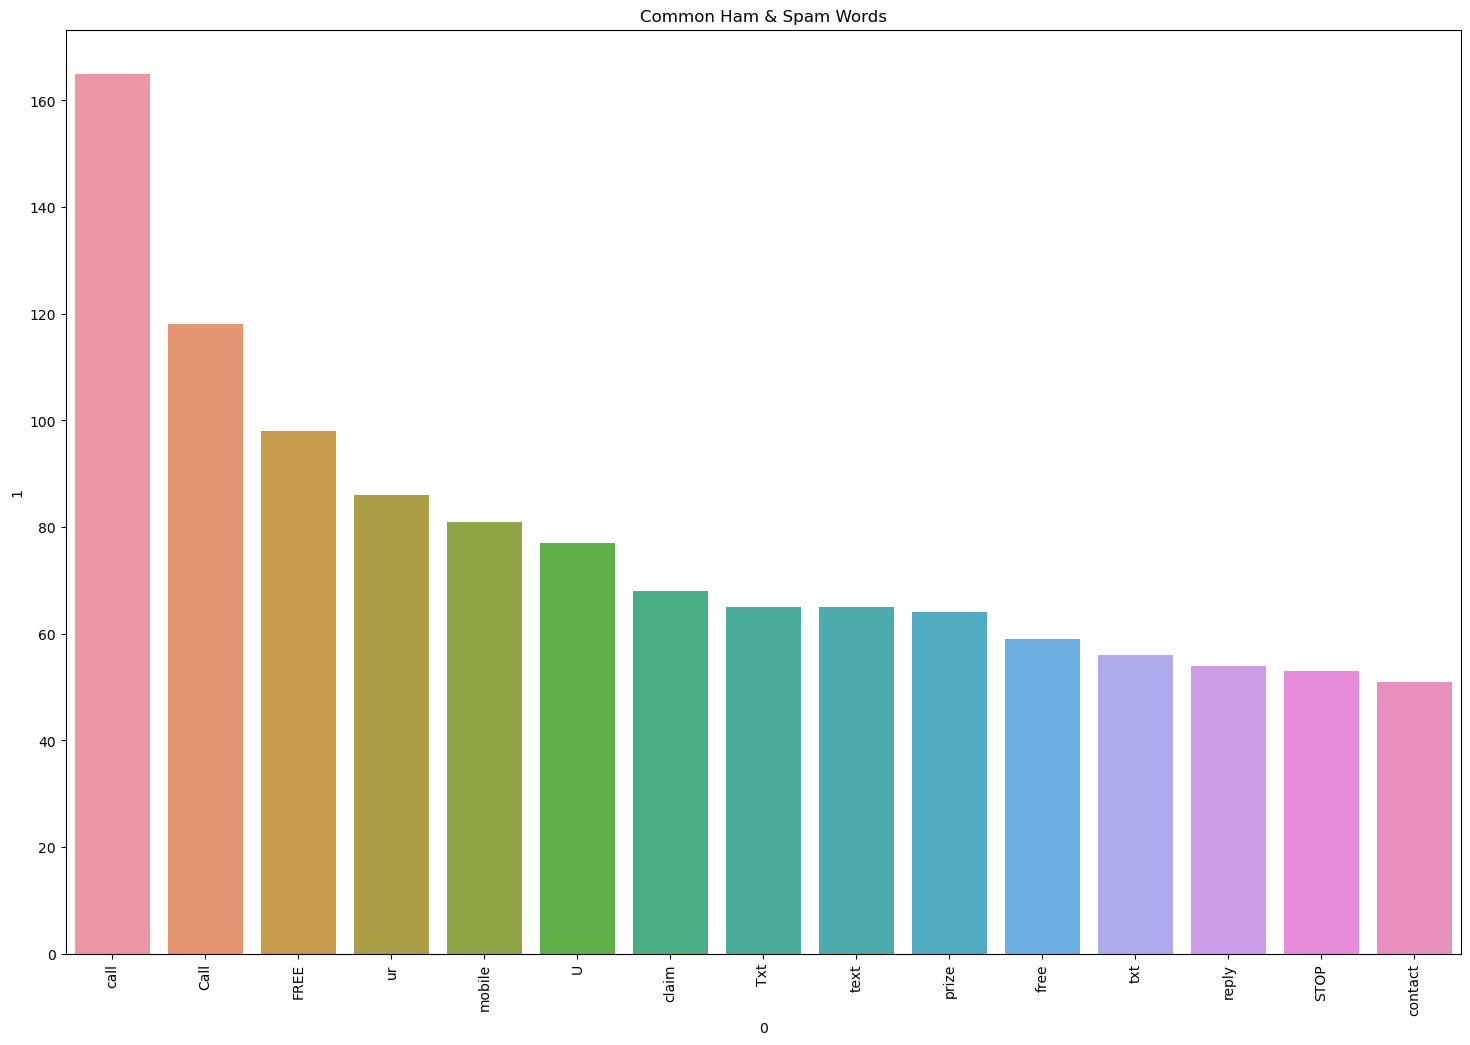

In [72]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(15))[0],pd.DataFrame(Counter(spam_corpus).most_common(15))[1])
plt.xticks(rotation='vertical')
plt.title("Common Ham & Spam Words")
plt.show()

### Building a Model using Naive Bayes
As textual data perform generally better in Naive Bayes. For Numerical input column we neeed to vectorizede data . we have donde that here in using TFIDF technique.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### For Gaussian NB

In [77]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
target_names = ['#Ham ', '#Spam']
print(classification_report(y_test,y_pred1, target_names = target_names))

              precision    recall  f1-score   support

       #Ham        0.97      0.90      0.93       896
       #Spam       0.54      0.80      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.79      1034
weighted avg       0.91      0.88      0.89      1034



#### Bernoulli NB

In [80]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [81]:
print(classification_report(y_test,y_pred3, target_names = target_names))

              precision    recall  f1-score   support

       #Ham        0.98      1.00      0.99       896
       #Spam       0.98      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



#### Multinomial NB

In [82]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(classification_report(y_test,y_pred2, target_names = target_names))

              precision    recall  f1-score   support

       #Ham        0.97      1.00      0.98       896
       #Spam       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

